## requirements

- ECGXMLReader.py -> xmltodict

```python
import xmltodict
```

- test_modules.py -> matplotlib, sklearn

```python
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score, average_precision_score, accuracy_score, recall_score, precision_score, \
f1_score
```

In [2]:
!pip install xmltodict

In [2]:
!pip install sklearn

  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 8.0 MB 6.7 MB/s            
     |████████████████████████████████| 306 kB 16.2 MB/s            
     |████████████████████████████████| 33.2 MB 8.2 MB/s             
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=20c3422881da633f93c08b8a67f728be30cac57da8cdec22797072db7e088525
  Stored in directory: /Users/heiju/Library/Caches/pip/wheels/e4/7b/98/b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [11]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [14]:
import sys
sys.version

'3.7.11 (default, Jul 27 2021, 14:32:16) \n[GCC 7.5.0]'

In [9]:
import torch
torch.__version__

'1.9.0+cu102'

## 데이터 전처리 (Data Preprocessing)

In [1]:
from utils.data_preprocess import DataPreprocess

In [2]:
train_arr_path = 'electrocardiogram/data/train/arrhythmia/'
train_nor_path = 'electrocardiogram/data/train/normal/'

In [3]:
valid_arr_path = 'electrocardiogram/data/validation/arrhythmia/'
valid_nor_path = 'electrocardiogram/data/validation/normal/'

In [4]:
# train
DataPreprocess(path_arr=train_arr_path, path_nor=train_nor_path, 
               data_filename='./train_data', label_filename='./train_label',
               data_type='train')

Decoding in process... Done!
Saving data as .npy... 

/Users/heiju/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


Done!


In [5]:
# validation
DataPreprocess(path_arr=valid_arr_path, path_nor=valid_nor_path, 
               data_filename='./valid_data', label_filename='./valid_label',
               data_type='valid')

Decoding in process... Done!
Saving data as .npy... Done!


In [ ]:
# test
DataPreprocess(path_arr=test_arr_path, path_nor=test_nor_path, 
               data_filename='./test_data', label_filename='./test_label')

In [6]:
import numpy as np
train_data = np.load('./train_data.npy', allow_pickle=True)
train_label = np.load('./train_label.npy', allow_pickle=True)
valid_data = np.load('./valid_data.npy', allow_pickle=True)
valid_label = np.load('./valid_label.npy', allow_pickle=True)

In [8]:
len(train_data), len(train_label), len(valid_data), len(valid_label)

(38836, 38836, 4859, 4859)

## 학습 (Training)

In [1]:
from train import Train
from models.resnet import resnet34
from models.ecg_dnn import dnn

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
model = dnn()

In [4]:
n_epoch_list = list(range(5, 11))
batch_size_list = [16, 32, 64]
lr_list = [0.01, 0.001, 0.0001]

In [5]:
n_epoch_list

[5, 6, 7, 8, 9, 10]

In [6]:
config_dict = {'n_epoch': 3, 'batch_size': 64, 'lr': 0.001,}

In [7]:
train = Train(model, config_dict)  # 초기화

In [8]:
train.train_model()

Train Epoch 1 start!
[Train] loss: 0.368
[Test]  loss: 0.726

Area Under the Curve(AUC):  0.5064638783269961
Average Precision:  0.46196891191709843
0.46573369005968307
1.0
0.46196891191709843
0.6319818542670825

Train Epoch 2 start!
[Train] loss: 0.149
[Test]  loss: 0.643

Area Under the Curve(AUC):  0.6710521692109029
Average Precision:  0.5646705242823054
0.6493105577279276
0.9344997756841633
0.5720955781378743
0.7097103918228279

Train Epoch 3 start!
[Train] loss: 0.132
[Test]  loss: 0.652

Area Under the Curve(AUC):  0.6064567991580054
Average Precision:  0.5185873556239715
0.5750154352747479
0.987438313144908
0.5193487494100991
0.6806865625483223

190403.484375 ms


DNN(
  (conv): Conv1d(12, 64, kernel_size=(16,), stride=(1,), padding=same, bias=False)
  (bn): BatchNorm1d(64, eps=0.001, momentum=0.99, affine=True, track_running_stats=True)
  (relu): ReLU()
  (res_blk1): ResidualBlock(
    (relu): ReLU(inplace=True)
    (conv_skip): Conv1d(64, 128, kernel_size=(1,), stride=(1,), padding=same, bias=False)
    (conv_1): Conv1d(64, 128, kernel_size=(17,), stride=(1,), padding=same, bias=False)
    (conv_2): Conv1d(128, 128, kernel_size=(17,), stride=4, padding=(7,), bias=False)
    (bn_act): Sequential(
      (0): BatchNorm1d(128, eps=0.001, momentum=0.99, affine=False, track_running_stats=True)
      (1): ReLU(inplace=True)
    )
    (dropout): Dropout(p=0.19999999999999996, inplace=False)
  )
  (res_blk2): ResidualBlock(
    (relu): ReLU(inplace=True)
    (conv_skip): Conv1d(128, 196, kernel_size=(1,), stride=(1,), padding=same, bias=False)
    (conv_1): Conv1d(128, 196, kernel_size=(17,), stride=(1,), padding=same, bias=False)
    (conv_2): Conv1d(

In [ ]:
!wandb login

In [ ]:
from model.ecg_dnn import dnn
from train_wandb import Train as MonitorTraining

model = dnn()
config_dict = {'n_epoch': 100, 'batch_size': 64, 'lr': 0.001,}
train_monitor = MonitorTraining(model, config_dict)
trained_model = train_monitor.train_model()

## 검증 (Validation/Test)

In [1]:
from test_modules import predict, print_scores, plot_roc_curve

In [2]:
import torch

In [3]:
from models.resnet import resnet34

In [4]:
model = resnet34()

In [5]:
model.load_state_dict(torch.load('./weights/epoch_100_lr_0001', map_location=torch.device('cpu')))

<All keys matched successfully>

In [6]:
y_target, y_predicted = predict(model, data_path='./valid_data.npy', label_path='./valid_label.npy')

In [7]:
print_scores(y_target, y_predicted)

                              Scores
Area Under the Curve (AUC)  0.929050
Average Precision           0.862991
Accuracy Score              0.924676
Recall Score                0.982055
Precision Score             0.870378
F1 Score                    0.922850


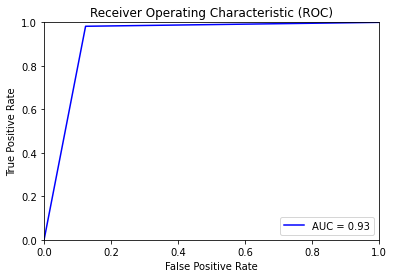

In [8]:
plot_roc_curve(y_target, y_predicted, guideline=False, save_png=True)

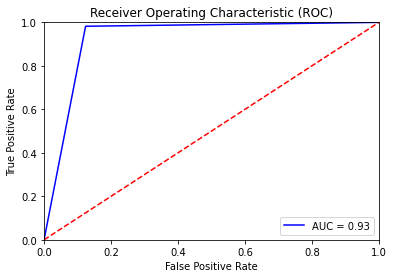

In [9]:
plot_roc_curve(y_target, y_predicted, guideline=True, save_png=True)